In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

true_b = 1
true_w = 2
N = 100

# 数据生成
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# 打乱索引
idx = np.arange(N)
np.random.shuffle(idx)

# 使用前80个索引进行训练
train_idx = idx[:int(N * 0.8)]
# 使用剩余的索引进行验证
val_idx = idx[int(N * 0.8):]

# 生成训练集和验证集
train_x, train_y = x[train_idx], y[train_idx]
val_x, val_y = x[val_idx], y[val_idx]

In [17]:
# 设置学习率
lr = 0.1
# 设置设备
device = "cpu"

x_train, y_train = torch.as_tensor(train_x), torch.as_tensor(train_y)

# 第0步: 随机初始化参数b和w.
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 定义SGD优化器来更新参数
optimizer = optim.SGD([b, w], lr=lr)

# 定义MSE损失函数
loss_fn = nn.MSELoss(reduction='mean')

n_epochs = 1000

for epoch in range(n_epochs):
    yhat = w * x_train + b
    # 第2步计算损失
    # error = yhat - y_train
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train)

    # 第3步：计算参数b和w的梯度 
    loss.backward()
    # print(loss.cpu().detach().numpy())
    print(loss.item())

    # 第4步：使用梯度和学习率
    # 更新参数
    optimizer.step()
    optimizer.zero_grad()

print(b, w)

2.7474866465858563
1.6097925706651672
0.9653074410431506
0.5995663270876046
0.39138099054090875
0.27227064227348985
0.20353760424266826
0.16331389922506223
0.13924138968453192
0.12433565313146792
0.11464882273937278
0.107948945983701
0.1029736575326106
0.09900854360447212
0.09564883396276623
0.0926647904079061
0.08992555786537877
0.087356236077508
0.08491356978189508
0.08257216577814719
0.08031681267925946
0.07813804701431667
0.07602965886196557
0.07398735050778078
0.0720079005185896
0.0700887157606988
0.0682276041836625
0.06642258131011489
0.06467185639740056
0.06297371530672971
0.061326557807854155
0.0597288136512498
0.058178995402072387
0.056675658797840686
0.05521740596118503
0.053802889525394915
0.05243079161603995
0.05109983548824056
0.04980878992135772
0.04855645044629349
0.04734167325121762
0.046163315531105496
0.04502029884433496
0.04391154497201125
0.042836042957235816
0.04179279697750193
0.040780832244736595
0.03979920499949566
0.03884701725508841
0.0379233788293291
0.037027

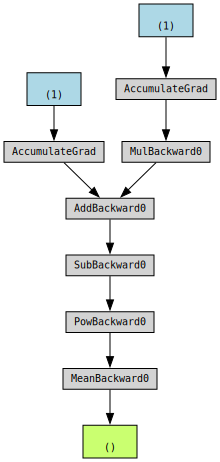

In [10]:

# 第0步: 随机初始化参数b和w.
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b + w * x_train
error = (yhat -y_train) 
loss = (error ** 2).mean()

make_dot(loss)

In [18]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # 为了使b和w成为模型的实际参数
        # 需要使用nn.Parameter对它们进行包装
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

In [19]:
torch.manual_seed(42)
# 创建ManualLinearRegression模型的dummy实例
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [23]:
lr = 0.1

# 第0步：初始化参数b和w
torch.manual_seed(42)
# 创建一个模型并立即发送到设备
model = ManualLinearRegression().to(device=device)

# 定义SGD优化器来更新参数
optimizer = optim.SGD(model.parameters(), lr=lr)

# 定义损失函数
loss_fn = nn.MSELoss(reduction='mean')

# 定义周期数
n_epochs = 1000

model.train()

for epoch in range(n_epochs):
    yhat = model(x_train)
    loss = loss_fn(yhat, y_train)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('b', tensor([1.0235])), ('w', tensor([1.9690]))])
